<a href="https://colab.research.google.com/github/drednout5786/Python/blob/master/MNIST_Anton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.layers import Dropout
from keras import layers
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

In [0]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [0]:
#Характеристики ответов
print (y_train_org.shape)
print (y_test_org.shape)
y_train_org

(60000,)
(10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
y_test_org

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
print (x_train_org.shape)
print (x_test_org.shape)
#x_train_org[0] #закодированная 5

(60000, 28, 28)
(10000, 28, 28)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


<function matplotlib.pyplot.show>

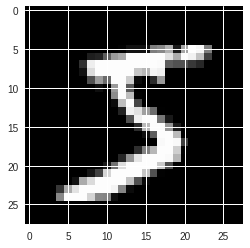

In [0]:
n=0 #закодированная 5 в обучающей выборке
plt.imshow(toimage(x_train_org[n]).convert('RGBA'))
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


<function matplotlib.pyplot.show>

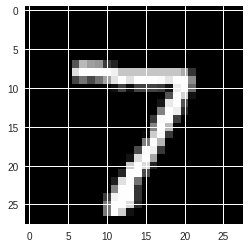

In [0]:
n=0 #закодированная 7 в тестовой выборке
plt.imshow(toimage(x_test_org[n]).convert('RGBA'))
plt.show

In [0]:
x_train = x_train_org.reshape(60000,784)# переведем данные в 2 мерный массив. т.к. 28*28 = 784
x_test =  x_test_org.reshape(10000,784)

In [0]:
x_train = x_train.astype('float32')
x_train = x_train/255 #Нормализуем данные - переводим их в значения от 0 до 1
#x_train[0]

In [0]:
print(y_train_org[n])

5


In [0]:
print(y_test_org[n])

7


In [0]:
print(x_train.shape[0], 'train samples') #Количество в обучающей выборке

60000 train samples


In [0]:
print(x_test.shape[0], 'test samples') #Количество в тестовой выборке

10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [0]:
print(y_train[n]) #5

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
print(y_test[n]) #7

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
#Создаем последовательную модель. В Keras доступны два типа моделей: последовательные и с функциональным API.
model = Sequential()

In [0]:
#Добавляем в созданную модель новые полносвязные слои: Dense. 
#На каждом слое используется функция «dense» для полного соединения слоев друг с другом. 
#В скрытых слоях будем используем функцию активации «relu», потому это практически всегда приводит к удовлетворительным результатам.
#Входной слой: в нем 800 нейронов. На вход подается информация с 784 пикселов.
#model.add(Dropout(0.2, input_shape=(784,))) # dropout on the inputs
# это помогает имитировать шум или отсутствующие данные
model.add(Dense(800, input_dim = 784, activation = "relu"))
model.add(Dropout(0.5))
#Выходной слой: "softmax" означает, что сумма всех значений на выходе из нейронной сети должна равняться 1. Т.е. почти все значения должны быть близки к 0 и только одно близко к единице.
model.add(Dense(10, activation = "softmax"))

In [0]:
#Прежде чем обучать нейронную сеть надо ее скомпилировать.
#Будем использовать оптимизатор «adam». Оптимизатор — это алгоритм, который изменяет веса и смещения во время обучения. 
#В качестве функции потерь (функцию ошибки loss) используем бинарную кросс-энтропию (так как мы работаем с бинарной классификацией), 
#в качестве метрики оценки — точность - доля правильных ответов.
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
print(len(model.layers)) # Получили 2 слоя

3


In [0]:
#Обучаем модель с учителем. В каждый раз берем по 200 картинок. Это размер минивыборки.20 - сколько раз мы передаем данные для обучения нейронной сети.
history = model.fit(x_train, y_train, batch_size = 200, epochs = 20, validation_split=0.2, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3674 - acc: 0.8911 - val_loss: 0.1768 - val_acc: 0.9492
Epoch 2/20
48000/48000 [==============================] - 1s 31us/sample - loss: 0.1682 - acc: 0.9510 - val_loss: 0.1225 - val_acc: 0.9638
Epoch 3/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.1228 - acc: 0.9634 - val_loss: 0.1008 - val_acc: 0.9689
Epoch 4/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0986 - acc: 0.9704 - val_loss: 0.0901 - val_acc: 0.9727
Epoch 5/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0810 - acc: 0.9757 - val_loss: 0.0851 - val_acc: 0.9728
Epoch 6/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0692 - acc: 0.9791 - val_loss: 0.0799 - val_acc: 0.9768
Epoch 7/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0612 - acc: 0.9811 - val_loss: 0.

In [0]:
print(history.history.keys()) #  a history attribute containing the lists of successive losses and other metrics.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [0]:
#Проверка точности полученной модели на тестовой выборке
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3081562224268996
Test accuracy: 0.9805


In [0]:
print('Доля верных ответов на тестовой выборке:', round(score[1]*100,4), "%")

Доля верных ответов на тестовой выборке: 98.05 %


In [0]:
#Значение ошибки на обучающей выборке
history.history['loss']

[0.3673587607840697,
 0.16820157517989476,
 0.12282771216705442,
 0.09860716865708431,
 0.08103312391322107,
 0.06915660310381402,
 0.0611907278575624,
 0.05267520473959545,
 0.046439283112219225,
 0.04299973395342628,
 0.03766086696026226,
 0.03602507245571663,
 0.03239869291816528,
 0.028961340696938957,
 0.027278182100659857,
 0.02470435441743272,
 0.022607419977430255,
 0.02194604527418657,
 0.022111813514493407,
 0.019182175572495908]

In [0]:
#Доля правильных ответов
history.history['val_acc']

[0.94925,
 0.96375,
 0.96891665,
 0.9726667,
 0.97275,
 0.97683334,
 0.97908336,
 0.97875,
 0.97925,
 0.97975,
 0.9798333,
 0.98083335,
 0.9805833,
 0.98108333,
 0.98158336,
 0.9816667,
 0.9805833,
 0.9805833,
 0.9815,
 0.98191667]

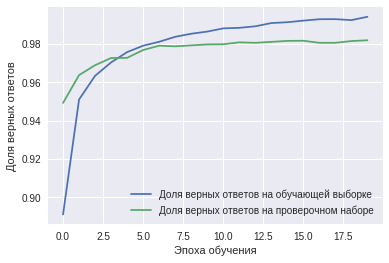

In [0]:
#Рисуем график
plt.plot(history.history['acc'], label = "Доля верных ответов на обучающей выборке")
plt.plot(history.history['val_acc'], label = "Доля верных ответов на проверочном наборе")
plt.xlabel ("Эпоха обучения")
plt.ylabel ("Доля верных ответов")
plt.legend ()
plt.show ()

In [0]:
#Save partly trained model
model.save("mnist_dense.h5")

In [0]:
!ls #Команда Linux

'2 (1).png'   2.png   mnist_dense.h5   sample_data


In [0]:
model

In [0]:
#files.download("mnist_dense.h5")

In [0]:
#model.load_weights('mnist_dense.h5', by_name=True)

In [0]:
from keras.models import load_model

In [0]:
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

In [0]:
#Load partly trained model
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model('mnist_dense.h5')
model
#https://askvoprosy.com/voprosy/unknown-initializer-glorotuniform-when-loading-keras-model

In [0]:
#model = load_model('mnist_dense.h5')

In [0]:
#Используем полученную модель для распознования цифр.
n_rec = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


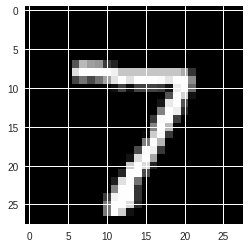

In [0]:
plt.imshow(toimage(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [0]:
x = x_test[n_rec]
x = np.expand_dims(x, axis = 0)

In [0]:
prediction = model.predict(x)

In [0]:
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [0]:
prediction = np.argmax(prediction)
print(prediction)

7


In [0]:
print(y_test_org[n_rec])

7


In [0]:
files.upload()

Saving 2.png to 2 (2).png


{'2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x06\x00\x00\x00r\r\xdf\x94\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x16%\x00\x00\x16%\x01IR$\xf0\x00\x00\x03nIDATHK\xedVO(\xa4a\x18\x7f\xc6\x98\x89\xf1g\xb9\xc8\xb2\xcb\xf8\x17!\x17\x9b\x03c\xca\xd5\xc1U!.\xca\x89\x94\xcbN\xcd^\x94\x12\xca\xba\x88\x84\xda\xa9\x9d\x83\x14i&spQ\x8e\xb3\xd1(R\x0c\x8a\x18\xd4\x18\xc6\x083\xbf}\xde\xd7g\xb7\xd6\xfc\xb3Y\xa7\xfdM_\xcd\xf7}\xcf\xfb\xfe\xde\xe7y~\xbf\xa7O\xe5\xdatA\x97\xac\xa3\xb7\xc0M\xe0\x86T\xbb\xbb\xbb(,,T\x1e\xfd[\xec\xed\xedQ\x82\xf2\xff\xcd\xf0\x9f0"\x00\xd0\xf5\xf55\x1d\x1e\x1e\xd2\xc2\xc2\x02-..\xd2\xfd\xfd\xbd\xf26\n\x84h^\x82\x87\x87\x07\xb8\xddn\x98\xcdf466\xa2\xa4\xa4\x04999(//\xc7\xec\xec\xac\x12\x15\x1e\x82+n\xc2P(\x84\xad\xad-\xf4\xf6\xf6\xa2\xa0\xa0\x00\xa9\xa9\xa9HJJ\xc2\x87\x8f\x1f\xe5\xbdV\xab\x95\x078::RV<G\xdc\x84\x97\x97\x97\xe8\xeb\xebCnn\xae\xdcX\xa5RA\xadV\xc3`0`

In [0]:
!ls

'2 (1).png'  '2 (2).png'   2.png   mnist_dense.h5   sample_data


In [0]:
img_path = '2.png'
img = image.load_img(img_path, target_size = (28, 28), color_mode = "grayscale")
img

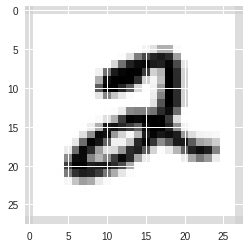

In [0]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [0]:
x = image.img_to_array(img)
x = x.reshape(1, 784)
x = 255 - x
x /= 255

In [0]:
prediction = model.predict(x)

In [0]:
prediction

array([[2.19344343e-09, 4.01752009e-09, 9.99966264e-01, 3.66018048e-06,
        1.39708654e-08, 6.08899597e-07, 8.08290657e-10, 2.92694240e-05,
        1.00818035e-07, 6.70850326e-08]], dtype=float32)

In [0]:
print(np.argmax(prediction))

2
